In [27]:
import pandas as pd
import numpy as np
import matplotlib as plt
#chargement du fichier principal
df=pd.read_csv("C:\\Users\\Ayoub\\Downloads\\Projet HomeCredit\\Data\\application_train.csv")
df.head()






,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#Aperçu 
print("Dimension du Dataset:",df.shape)

Dimension du Dataset: (307511, 122)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [21]:
target_counts=df["TARGET"].value_counts()
target_counts
# 24825 clients ont fait défaut (TARGET=1) et 282686 ont remboursé correctement (TARGET=0).

TARGET
0    282686
1     24825
Name: count, dtype: int64

<Axes: title={'center': 'Proportion of each class'}, ylabel='count'>

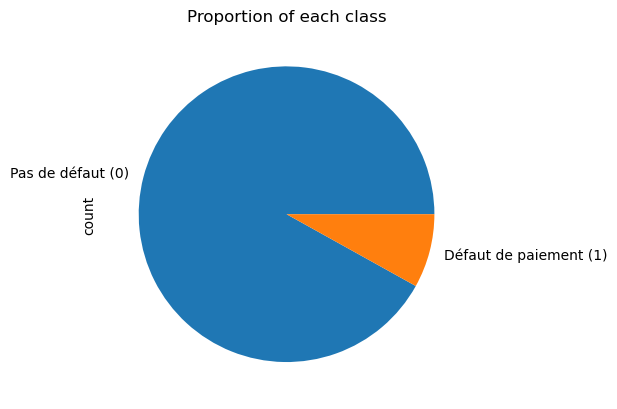

In [25]:
target_counts.plot.pie( labels=["Pas de défaut (0)", "Défaut de paiement (1)"],title='Proportion of each class')


In [33]:

df["NAME_CONTRACT_TYPE"].value_counts(normalize=True).apply(lambda x: f"{x*100:.2f}%")



NAME_CONTRACT_TYPE
Cash loans         90.48%
Revolving loans     9.52%
Name: proportion, dtype: object

In [35]:
df["CODE_GENDER"].value_counts(normalize=True).apply(lambda x: f"{x*100:.2f}%")


CODE_GENDER
F      65.83%
M      34.16%
XNA     0.00%
Name: proportion, dtype: object

In [53]:
pd.crosstab(df["CODE_GENDER"],df["TARGET"],normalize="index")*100

TARGET,0,1
CODE_GENDER,,
F,93.000672,6.999328
M,89.858080,10.141920
XNA,100.000000,0.000000


In [37]:
df["FLAG_OWN_CAR"].value_counts(normalize=True).apply(lambda x: f"{x*100:.2f}%")


FLAG_OWN_CAR
N    65.99%
Y    34.01%
Name: proportion, dtype: object

In [45]:
pd.crosstab(df["FLAG_OWN_CAR"], df["TARGET"], normalize='index') * 100


TARGET,0,1
FLAG_OWN_CAR,,
N,91.499773,8.500227
Y,92.756270,7.243730


Parmi les gens qui n'ont pas de voiture (N),8.5 % font défaut (TARGET = 1)

Parmi les gens qui possèdent une voiture (Y),seulement 7.2 % font défaut

Si la différence était énorme (ex. : 20% vs 5%), tu saurais que cette variable est très discriminante



In [39]:
df["FLAG_OWN_REALTY"].value_counts(normalize=True).apply(lambda x: f"{x*100:.2f}%")


FLAG_OWN_REALTY
Y    69.37%
N    30.63%
Name: proportion, dtype: object

In [47]:
pd.crosstab(df["FLAG_OWN_REALTY"], df["TARGET"], normalize='index') * 100

TARGET,0,1
FLAG_OWN_REALTY,,
N,91.675071,8.324929
Y,92.038423,7.961577


In [43]:
#Voir les vraies valeurs (non arrondies)
df["CNT_CHILDREN"].value_counts(normalize=True)


CNT_CHILDREN
0     0.700368
1     0.198754
2     0.086986
3     0.012087
4     0.001395
5     0.000273
6     0.000068
7     0.000023
14    0.000010
8     0.000007
9     0.000007
12    0.000007
10    0.000007
19    0.000007
11    0.000003
Name: proportion, dtype: float64

In [49]:
pd.crosstab(df["CNT_CHILDREN"],df["TARGET"],normalize="index")*100

TARGET,0,1
CNT_CHILDREN,,
0,92.288191,7.711809
1,91.076425,8.923575
2,91.278179,8.721821
3,90.368577,9.631423
4,87.179487,12.820513
5,91.666667,8.333333
6,71.428571,28.571429
7,100.000000,0.000000
8,100.000000,0.000000


In [69]:
missing=df.isnull().sum()
missing[missing > 0].sort_values(ascending=False).head(10)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_AVG        210199
dtype: int64